In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
admission = pd.read_csv("D:/Bootcamp ML & AI/admission_app/admission_data.csv")
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   motiv_letter_strength    503 non-null    float64
 3   recommendation_strength  499 non-null    float64
 4   gpa                      501 non-null    float64
 5   research_exp             505 non-null    object 
 6   admit_status             505 non-null    object 
 7   univ_tier                505 non-null    object 
dtypes: float64(5), object(3)
memory usage: 31.7+ KB


In [ ]:
admission.head()

,gre_score,toefl_score,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,univ_tier
0,337.0,118.0,4.5,4.5,9.65,yes,yes,low
1,324.0,107.0,4.0,4.5,8.87,yes,yes,low
2,316.0,104.0,3.0,3.5,8.00,yes,yes,high
3,322.0,110.0,3.5,2.5,8.67,yes,yes,high
4,314.0,103.0,2.0,3.0,8.21,no,no,high


In [ ]:
# check duplicated data overall
admission.duplicated().sum()
admission[admission.duplicated(keep=False)]
#Ada 5 data yang duplicated
#drop data duplicated
admission = admission.drop_duplicates()

In [ ]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                491 non-null    float64
 1   toefl_score              492 non-null    float64
 2   motiv_letter_strength    498 non-null    float64
 3   recommendation_strength  494 non-null    float64
 4   gpa                      496 non-null    float64
 5   research_exp             500 non-null    object 
 6   admit_status             500 non-null    object 
 7   univ_tier                500 non-null    object 
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


In [ ]:
# check missing values in each column
admission.isna().sum()
# percentage of missing values in each column
admission.isna().mean()
# drop all rows with missing values
admission = admission.dropna()

In [ ]:
# %%
admission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                471 non-null    float64
 1   toefl_score              471 non-null    float64
 2   motiv_letter_strength    471 non-null    float64
 3   recommendation_strength  471 non-null    float64
 4   gpa                      471 non-null    float64
 5   research_exp             471 non-null    object 
 6   admit_status             471 non-null    object 
 7   univ_tier                471 non-null    object 
dtypes: float64(5), object(3)
memory usage: 33.1+ KB


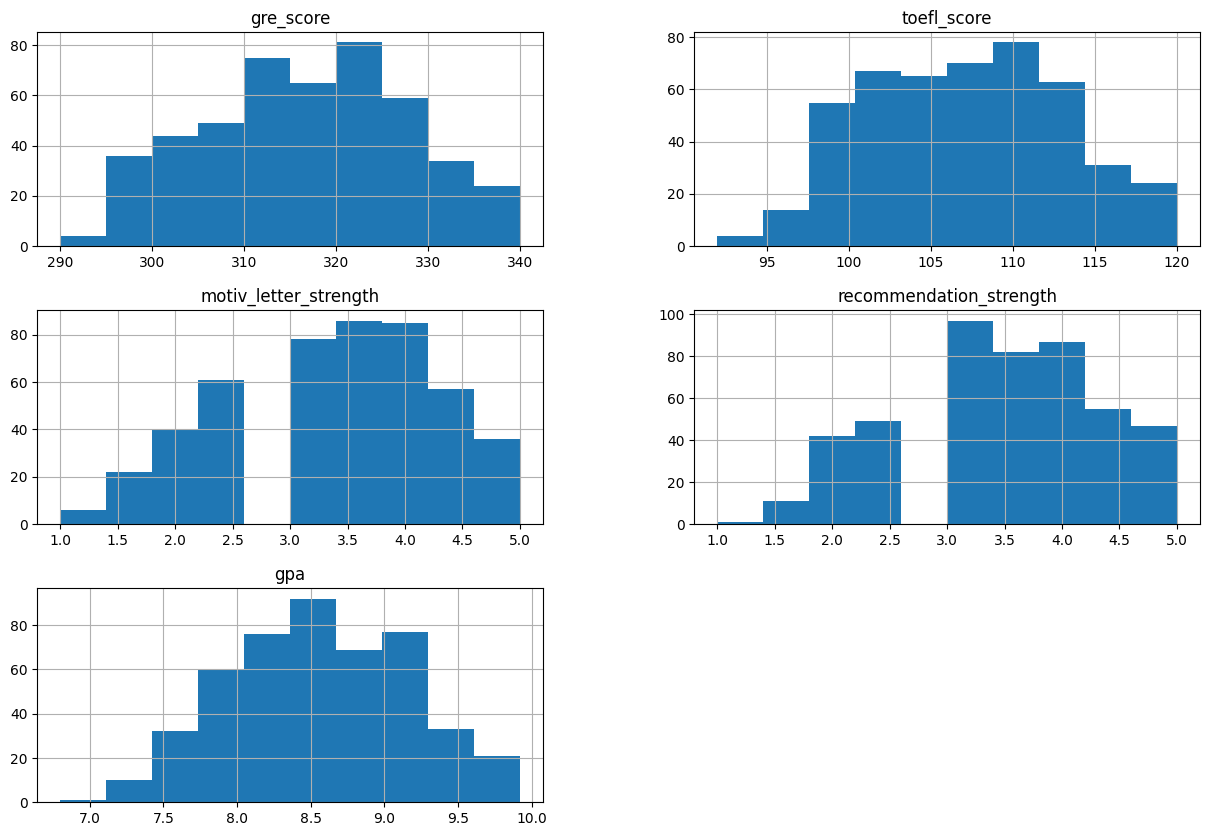

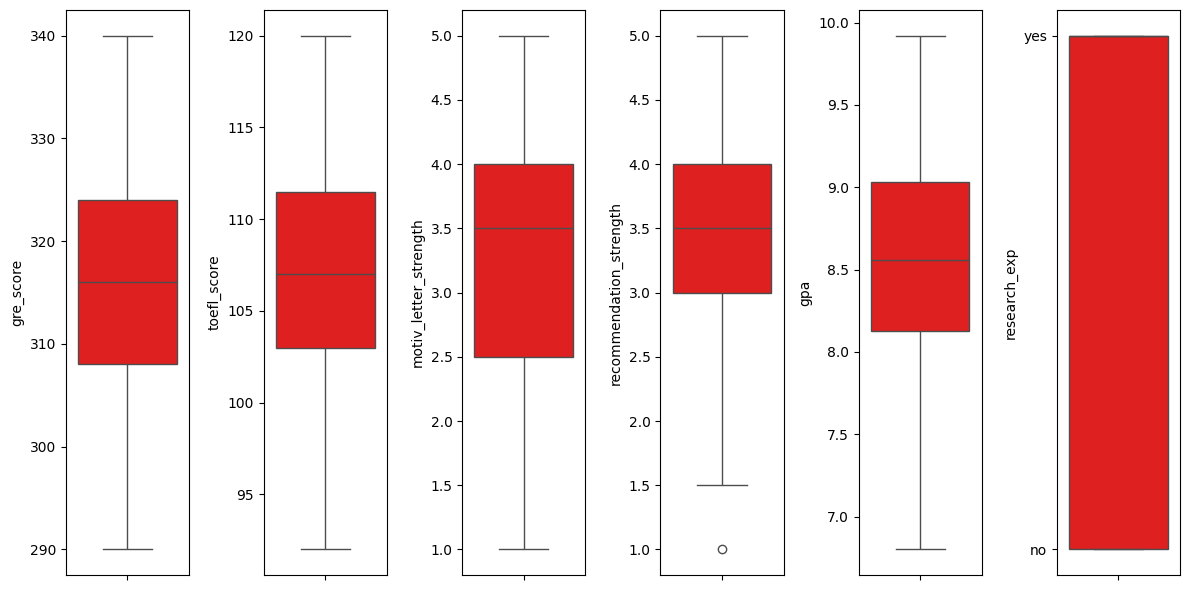

In [ ]:
admission.hist(figsize=(15, 10))
plt.show()
#semua sudah berdistribusi normal
#Cek Outlier
# draw boxplot for each numeric column
plt.figure(figsize=(12,6))

# plotting
features = ['gre_score','toefl_score','motiv_letter_strength','recommendation_strength','gpa','research_exp']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=admission[features[i]], color='red')
    plt.tight_layout()

In [ ]:
# Using IQR method
Q1 = admission['recommendation_strength'].quantile(0.25)
Q3 = admission['recommendation_strength'].quantile(0.75)
IQR = Q3 - Q1

admission = admission[~((admission['recommendation_strength'] < (Q1 - 1.5 * IQR)) | (admission['recommendation_strength'] > (Q3 + 1.5 * IQR)))]
# value counts of categorical columns in admission
features = ['research_exp','admit_status','univ_tier']

In [ ]:
for feature in features:
    print("***"*10)
    print(f'Value Counts of {feature}')
    print(admission[feature].value_counts())
    print('\n')

******************************
Value Counts of research_exp
research_exp
yes    256
no     214
Name: count, dtype: int64


******************************
Value Counts of admit_status
admit_status
yes    268
no     202
Name: count, dtype: int64


******************************
Value Counts of univ_tier
univ_tier
high    301
low     169
Name: count, dtype: int64




In [ ]:
research_exp_map = {
    'yes': 1,
    'no': 0
}

admission['research_exp'] = admission['research_exp'].map(research_exp_map)
# label encode admit_status
admit_status_map = {
    'yes': 1,
    'no': 0
}
admission['admit_status'] = admission['admit_status'].map(admit_status_map)
# label encode univ_tier
univ_tier_map = {
    'high': 1,
    'low': 0
}
admission['univ_tier'] = admission['univ_tier'].map(univ_tier_map)

In [ ]:
admission.head()

,gre_score,toefl_score,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,univ_tier
0,337.0,118.0,4.5,4.5,9.65,1,1,0
1,324.0,107.0,4.0,4.5,8.87,1,1,0
2,316.0,104.0,3.0,3.5,8.00,1,1,1
3,322.0,110.0,3.5,2.5,8.67,1,1,1
4,314.0,103.0,2.0,3.0,8.21,0,0,1


In [ ]:
# min-max scaling all column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in admission.columns:
    admission[col] = scaler.fit_transform(admission[[col]])
admission.describe()


,gre_score,toefl_score,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,univ_tier
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,0.526298,0.539210,0.591489,0.563222,0.566776,0.544681,0.570213,0.640426
std,0.225083,0.212024,0.242300,0.261829,0.191395,0.498530,0.495573,0.480387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.375000,0.428571,0.426282,0.000000,0.000000,0.000000
50%,0.520000,0.535714,0.625000,0.571429,0.564103,1.000000,1.000000,1.000000
75%,0.680000,0.705357,0.750000,0.714286,0.716346,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = admission.drop(columns='admit_status')
target = admission[['admit_status']]

feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# calculate vif score for each column in feature_admit_train
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_add = (pd.DataFrame(
            [vif(X.values, i) for i in range(len(X.columns))]
            ,index=X.columns)
            .reset_index())

vif_add.columns = ['feature','vif_score']
vif_add = vif_add.loc[vif_add.feature!='const']
vif_add

,feature,vif_score
1,gre_score,3.934518
2,toefl_score,3.556206
3,motiv_letter_strength,2.574945
4,recommendation_strength,2.142499
5,gpa,4.445787
6,research_exp,1.447792
7,univ_tier,1.667441


In [ ]:
admission.head()

,gre_score,toefl_score,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,univ_tier
0,0.94,0.928571,0.875,0.857143,0.913462,1.0,1.0,0.0
1,0.68,0.535714,0.750,0.857143,0.663462,1.0,1.0,0.0
2,0.52,0.428571,0.500,0.571429,0.384615,1.0,1.0,1.0
3,0.64,0.642857,0.625,0.285714,0.599359,1.0,1.0,1.0
4,0.48,0.392857,0.250,0.428571,0.451923,0.0,0.0,1.0


In [ ]:
X.head()

,const,gre_score,toefl_score,motiv_letter_strength,recommendation_strength,gpa,research_exp,univ_tier
438,1.0,0.56,0.642857,0.375,0.571429,0.557692,1.0,1.0
321,1.0,0.66,0.428571,0.750,0.714286,0.525641,1.0,1.0
22,1.0,0.76,0.857143,1.000,1.000000,0.865385,1.0,0.0
323,1.0,0.30,0.357143,0.250,0.285714,0.442308,0.0,1.0
47,1.0,0.98,0.964286,0.875,0.714286,0.929487,0.0,0.0


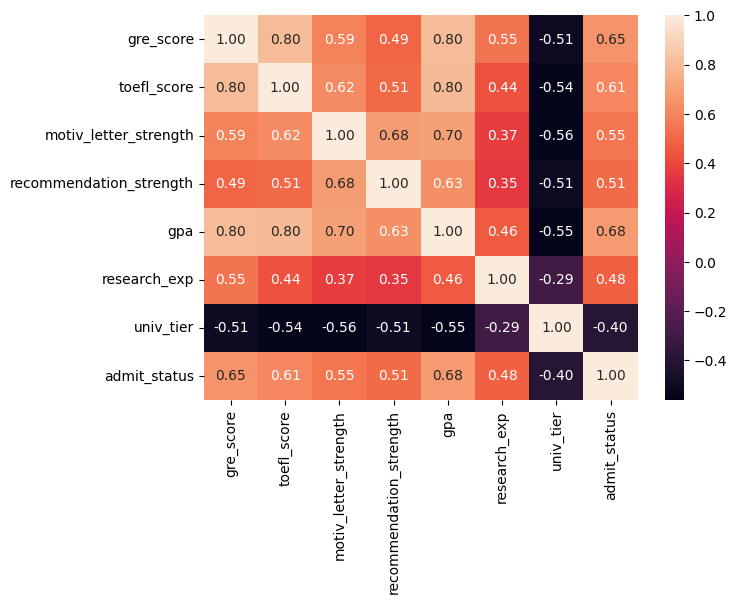

In [ ]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
# drop fitur yang redundan
feature_admit_train = feature_admit_train.drop(columns=['gre_score','toefl_score'])
feature_admit_test = feature_admit_test.drop(columns=['gre_score','toefl_score'])

In [ ]:
feature_admit_train

,motiv_letter_strength,recommendation_strength,gpa,research_exp,univ_tier
438,0.375,0.571429,0.557692,1.0,1.0
321,0.750,0.714286,0.525641,1.0,1.0
22,1.000,1.000000,0.865385,1.0,0.0
323,0.250,0.285714,0.442308,0.0,1.0
47,0.875,0.714286,0.929487,0.0,0.0
...,...,...,...,...,...
111,0.750,0.714286,0.602564,1.0,0.0
285,0.750,0.714286,0.788462,1.0,0.0
368,0.250,0.142857,0.346154,0.0,1.0
462,0.500,0.428571,0.365385,0.0,0.0


In [ ]:
admission.to_csv('D:/Bootcamp & AI/admission_app/admission_clean.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'D:\Bootcamp & AI\admission_app'

In [ ]:
admission.to_csv('D:/Bootcamp ML & AI/admission_app/admission_clean.csv', index=False)

In [ ]:
#regresi lasso
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=10,
                  random_state=42)

# train
lasso_reg.fit(feature_admit_train, target_admit_train)
#memunculkan hasil estimasi parameter
# retrieve the coefficients
# show as a nice dataframe

data = feature_admit_train
model = lasso_reg

coef_add = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_add

,feature,coefficient
0,intercept,[0.5851063829787234]
1,motiv_letter_strength,0.0
2,recommendation_strength,0.0
3,gpa,0.0
4,research_exp,0.0
5,univ_tier,-0.0


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 50),  # Coba alpha dari 0.0001 sampai 10
    cv=5,                           # 5-fold cross validation
    random_state=42
)

In [ ]:
lasso_cv.fit(feature_admit_train, target_admit_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,eps,0.001
,n_alphas,'deprecated'
,alphas,array([1.0000...00000000e+01])
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [ ]:
#Hasil alpha optimal dan koefisien model
print(f"Alpha optimal: {lasso_cv.alpha_:.6f}\n")

coef = pd.Series(lasso_cv.coef_, index=X.columns)
print("Koefisien regresi:")
print(coef)

Alpha optimal: 0.001677



ValueError: Length of values (5) does not match length of index (8)

In [ ]:
feature_admit_train

,motiv_letter_strength,recommendation_strength,gpa,research_exp,univ_tier
438,0.375,0.571429,0.557692,1.0,1.0
321,0.750,0.714286,0.525641,1.0,1.0
22,1.000,1.000000,0.865385,1.0,0.0
323,0.250,0.285714,0.442308,0.0,1.0
47,0.875,0.714286,0.929487,0.0,0.0
...,...,...,...,...,...
111,0.750,0.714286,0.602564,1.0,0.0
285,0.750,0.714286,0.788462,1.0,0.0
368,0.250,0.142857,0.346154,0.0,1.0
462,0.500,0.428571,0.365385,0.0,0.0


In [ ]:
#Hasil alpha optimal dan koefisien model
print(f"Alpha optimal: {lasso_cv.alpha_:.6f}\n")

coef = pd.Series(lasso_cv.coef_, index=feature_admit_train .columns)
print("Koefisien regresi:")
print(coef)

Alpha optimal: 0.001677

Koefisien regresi:
motiv_letter_strength      0.186653
recommendation_strength    0.146477
gpa                        1.213707
research_exp               0.195529
univ_tier                  0.000000
dtype: float64


In [ ]:
coef = pd.DataFrame({
    'feature':['intercept'] + feature_admit_train.columns.tolist(),
    'coefficient':[lasso_cv.intercept_] + list(lasso_cv.coef_)
})

coef

,feature,coefficient
0,intercept,-0.404727
1,motiv_letter_strength,0.186653
2,recommendation_strength,0.146477
3,gpa,1.213707
4,research_exp,0.195529
5,univ_tier,0.000000


In [ ]:
lasso_best=lasso_cv

In [ ]:
# prepare prediction result on train data
target_predict_train = lasso_best.predict(feature_admit_train)

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(root_mean_squared_error(target_admit_train, target_predict_train)))
print('MAE for training data is {}'.format(mean_absolute_error(target_admit_train, target_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(target_admit_train, target_predict_train)))

RMSE for training data is 0.34600583378291166
MAE for training data is 0.28442963082154105
MAPE for training data is 588540035149550.5


In [ ]:
# prepare prediction result on test data
feature_admit_test = feature_admit_test.to_numpy()
target_predict_test = lasso_best.predict(feature_admit_test)

# ground truth target
target_admit_test = target_admit_test.to_numpy().ravel()

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [ ]:
# prepare prediction result on test data
feature_admit_test = feature_admit_test.to_numpy()
target_predict_test = lasso_best.predict(feature_admit_test)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(root_mean_squared_error(target_admit_test, target_predict_test)))
print('MAE for testing data is {}'.format(mean_absolute_error(target_admit_test, target_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_admit_test, target_predict_test)))

RMSE for testing data is 0.31511706450172633
MAE for testing data is 0.2557227540373843
MAPE for testing data is 610486200810291.9


In [ ]:
#Simpan model ke file .pkl
with open("D:/Bootcamp ML & AI/admission_app/hasil.pkl", "rb") as file:
    pickle.dump(lasso_best, file)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Bootcamp ML & AI/admission_app/hasil.pkl'

In [ ]:
#Simpan model ke file .pkl
with open("D:/Bootcamp ML & AI/admission_app/hasil.pkl", "wb") as file:
    pickle.dump(lasso_best, file)

NameError: name 'pickle' is not defined

In [ ]:
import pickle

In [ ]:
#Simpan model ke file .pkl
with open("D:/Bootcamp ML & AI/admission_app/hasil.pkl", "wb") as file:
    pickle.dump(lasso_best, file)